# Graphical Models

Graphical models are graphical representations of conditional depencies between random variables. By merging together *probability theory* and *graph theory*, they provide a direct and compact way to visualize the structure of the model and motivate the design of new models and to structure complex probability calculations for performing efficient inference. 

We usually distinguish between two types of graphical models:
- **Bayesian Networks** are ideal for modelling *conditional dependencies* between variables and are represented by *directed graphs*
- **Markov Random Fields** are suitable for modelling *correlations*. In this case the underlying graph is *undirected*

### DAG Example

It contains information about usage of different transportation systems with a focus on cars and trains for different social groups. It includes:

- **Age (A)**: It is recorded as young (young) for individuals below 30 years, adult (adult) for individuals between 30 and 60 years old, and old (old) for people older than 60.
- **Sex (S)**: The biological sex of individual, recorded as male (M) or female (F).
- **Education (E)**: The highest level of education or training completed by the individual, recorded either high school (high) or university degree (uni).
- **Occupation (O)**: It is recorded as an employee (emp) or a self employed (self) worker.
- **Residence (R)**: The size of the city the individual lives in, recorded as small (small) or big (big).
- **Travel (T)**: The means of transport favoured by the individual, recorded as car (car), train (train) or other (other)

Travel is the target of the survey, the quantity of interest whose behaviour is under investigation.

<div> 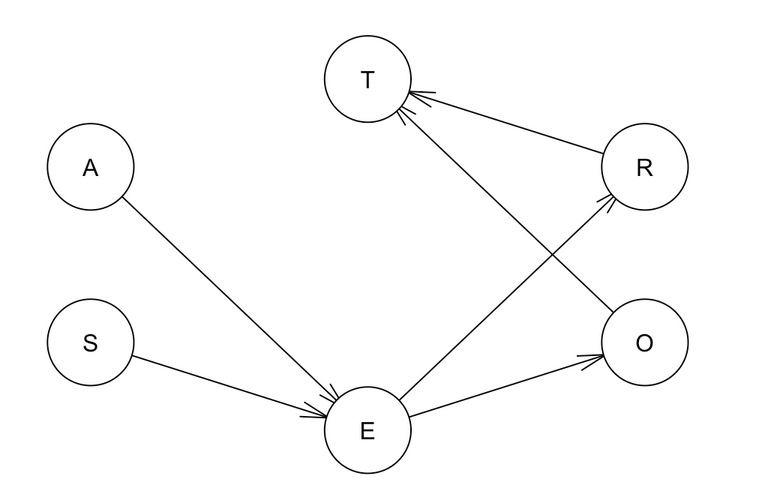</div>

[https://bookdown.org/robertness/causalml/docs/tutorial-probabilistic-modeling-with-bayesian-networks-and-bnlearn.html](https://bookdown.org/robertness/causalml/docs/tutorial-probabilistic-modeling-with-bayesian-networks-and-bnlearn.html)

We can represent the relationships between the variables in the survey data by a directed acyclic graph (DAG), where each **node** correspond to a variable in data and each **edge** represents a conditional dependence between two variables. 

The DAG represents a factorization of the *joint probability distribution* of this dataset: 

$$P(A,S,E,O,R,T)=P(A)P(S)P(E|A,S)P(O|E)P(R|E)P(T|O,R).$$

### Bayesian Network from Gaussian mixture model

In this section we consider a mixture model taken from [Blei, "Build, Compute, Critique, Repeat:Data Analysis with Latent Variable Models"](http://www.cs.columbia.edu/~blei/papers/Blei2014b.pdf).  

Here the data are clustered and each data point is drawn from a distribution associated with its assigned cluster. Given observed data, the mixture model posterior is a conditional distribution over clusterings and parameters. This conditional identifies a likely *grouping of the data* and the *characteristics of each group*.

The generative process is:
- $\theta \sim Dirichlet(\alpha)$
- for each mixture component $k$, $\mu_k \sim \mathcal{N}(0,\sigma_0^2)
$
- for each data point $i$:
 - $z_i | \theta \sim Discrete(\theta)$
 - $x_i|z_i,\mu \sim \mathcal{N}(\mu_{z_i},1)$

<div> 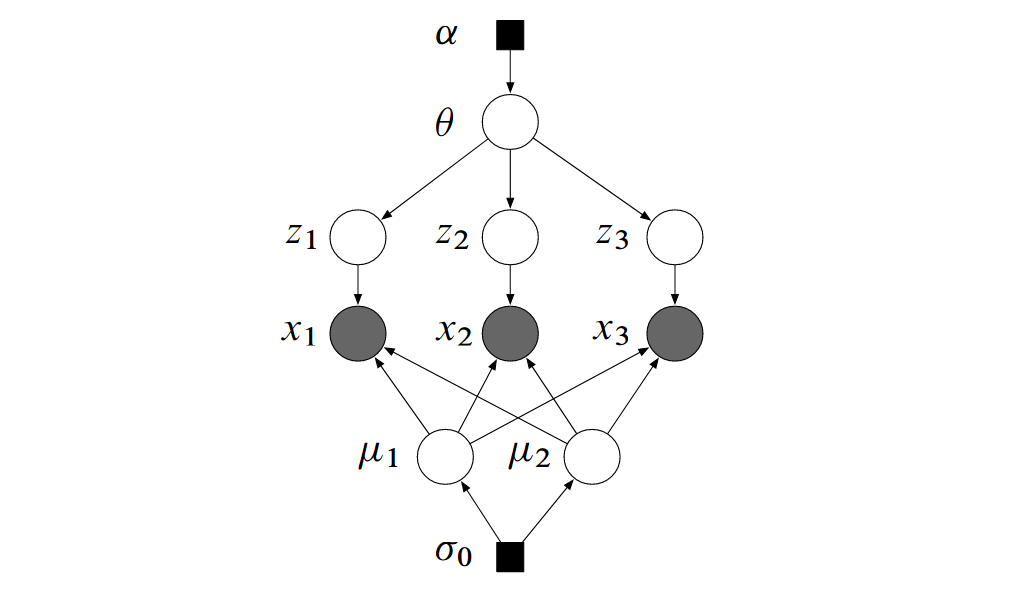</div>




[http://www.cs.columbia.edu/~blei/papers/Blei2014b.pdf](http://www.cs.columbia.edu/~blei/papers/Blei2014b.pdf)

where $\theta, \mu_k, z_i$ are the **hidden variables**, $x_i$ the **observables** and $\alpha, \sigma_0$ the **hyperparameters**. The joint distribution factorizes as
$$p(\theta,\mu,z,x|\sigma_0,\alpha) = p(\theta|\alpha)\prod_{k=1}^K p(\mu_k|\sigma_0)\prod_{i=1}^N[p(z_i|\theta)p(x_i|z_i,\mu,z_i)].$$

From this representation the identification of *global* and *local* variables comes easy:
the first ones describe the hidden structure which is shared for the entire dataset and the latter ones only regard the distribution of single observations.

The posterior distribution, given the observations, is
$$p(\theta,\mu,z|x,\sigma_0,\alpha)=\frac{p(\theta,\mu,z,x|\sigma_0,\alpha)}{p(x|\sigma_0,\alpha)}.$$

**Pyro implementation**

In [4]:
import pyro
import torch

pyro.enable_validation(True)
data = torch.tensor([0., 1., 10., 11., 12.])
K = 2  # number of components

# hyperparameters
alpha = 0.5
sigma_0 = 10.0

def model(data):
    # Global variables.
    theta = pyro.sample('theta', dist.Dirichlet(alpha * torch.ones(K)))
    with pyro.plate('components', K):
        mu = pyro.sample('mu', dist.Normal(0., sigma_0))
    with pyro.plate('data', len(data)):
        # Local variables.
        z = pyro.sample('z', dist.Categorical(theta))
        pyro.sample('x', dist.Normal(mu[z], sigma_0), obs=data)

In [ ]:
spiegare:
    - pyro categorical
    - enable validation
    - tensors, che sono, a che servono...

`pyro.plate()` method guarantees that all computation within a `plate` is conditionally independent

```
with pyro.plate("name", size):
    # ...do conditionally independent stuff ...
```

## Hidden Markov Models?

## Homework